# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Note:** This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

This notebook provides an introduction to Dandiset 001195 version 0.250408.1733, which contains supporting data for a study on the role of dorsal raphe dopamine projections in loneliness-like states. The dataset includes *in vivo* calcium imaging data with supporting behavioral videos and *ex vivo* patch-clamp electrophysiology recordings.

You can find more information about this Dandiset on the DANDI Archive: https://dandiarchive.org/dandiset/001195/0.250408.1733

This Dandiset contains data related to the study "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State". The electrophysiology data, which we will explore in this notebook, likely consists of patch-clamp recordings from neurons in specific brain regions (e.g., CeA, BNST, BLP as mentioned in the Dandiset metadata), investigating their electrical properties and responses to different stimuli. The overall scientific goal is to understand how these neurons, particularly dorsal raphe dopamine neurons and their projections, are involved in loneliness-like states.

This notebook will cover:
1. Loading the Dandiset using the DANDI API.
2. Examining the contents of an NWB file from the Dandiset.
3. Visualizing some of the electrophysiology data.

## Required Packages
To run this notebook, you will need the following Python packages installed:
- `itertools`
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`


## Loading the Dandiset
We can use the `dandi` Python client to connect to the DANDI archive and access the Dandiset metadata and assets.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## Examining an NWB File
The Dandiset contains several NWB files. We will load one of the icephys NWB files to explore its structure and data. We will use the file located at `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`.

The direct download URL for this asset is:
https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/

You can also explore this NWB file directly on Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some high-level information from the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Targeted layer: {nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")

NWB file identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
Experimenter: ('Matthews, Gillian',)
Subject ID: 23
Subject age: P302D
Subject sex: F
Targeted layer: CeA


The NWB file contains various types of data, including intracellular electrophysiology recordings (`acquisition`) and the corresponding stimuli (`stimulus`). We can inspect the available data series within these sections. In this NWB file, the `acquisition` section contains the voltage or current responses recorded from the cell, while the `stimulus` section contains the electrical stimuli that were applied. Each series in these sections typically corresponds to a single sweep or episode of the recording.

In [3]:
print("Available data series in nwb.acquisition:")
for item_name in nwb.acquisition:
    print(f"- {item_name} ({type(nwb.acquisition[item_name]).__name__})")

print("\nAvailable data series in nwb.stimulus:")
for item_name in nwb.stimulus:
    print(f"- {item_name} ({type(nwb.stimulus[item_name]).__name__})")

Available data series in nwb.acquisition:
- current_clamp-response-01-ch-0 (CurrentClampSeries)
- current_clamp-response-01-ch-1 (CurrentClampSeries)
- current_clamp-response-02-ch-0 (CurrentClampSeries)
- current_clamp-response-02-ch-1 (CurrentClampSeries)
- current_clamp-response-03-ch-0 (CurrentClampSeries)
- current_clamp-response-03-ch-1 (CurrentClampSeries)
- current_clamp-response-04-ch-0 (CurrentClampSeries)
- current_clamp-response-04-ch-1 (CurrentClampSeries)
- current_clamp-response-05-ch-0 (CurrentClampSeries)
- current_clamp-response-05-ch-1 (CurrentClampSeries)
- current_clamp-response-06-ch-0 (CurrentClampSeries)
- current_clamp-response-06-ch-1 (CurrentClampSeries)
- current_clamp-response-07-ch-0 (CurrentClampSeries)
- current_clamp-response-07-ch-1 (CurrentClampSeries)
- current_clamp-response-08-ch-0 (CurrentClampSeries)
- current_clamp-response-08-ch-1 (CurrentClampSeries)
- current_clamp-response-09-ch-0 (CurrentClampSeries)
- current_clamp-response-09-ch-1 (Curren

The `icephys_sequential_recordings` table provides information about the different sweeps or episodes in the recording and the stimulus type used.

In [4]:
# Display information from the icephys_sequential_recordings table
print("\nIcephys Sequential Recordings Table:")
sequential_recordings_df = nwb.icephys_sequential_recordings.to_dataframe()
print(sequential_recordings_df.head())


Icephys Sequential Recordings Table:
                              simultaneous_recordings  \
id                                                      
0                                              rec...   
1                                              rec...   
2                                              rec...   
3                                              rec...   
4                                              rec...   

                                        stimulus_type  
id                                                     
0   episodic stimulation, 1s steps, 20pA increment...  
1   episodic stimulation, 10* 1Hz laser pulses, 5m...  
2   episodic stimulation, 1 laser pulse, 5ms width...  
3   episodic stimulation, 1 laser pulse, 5ms width...  
4   episodic stimulation, 8*30Hz laser pulses, 5ms...  


## Visualizing Electrophysiology Data
Let's visualize some of the current clamp response and stimulus data from Channel 0. This channel appears to contain clean recordings. We will plot the responses to the first few current steps to observe the voltage deflections.

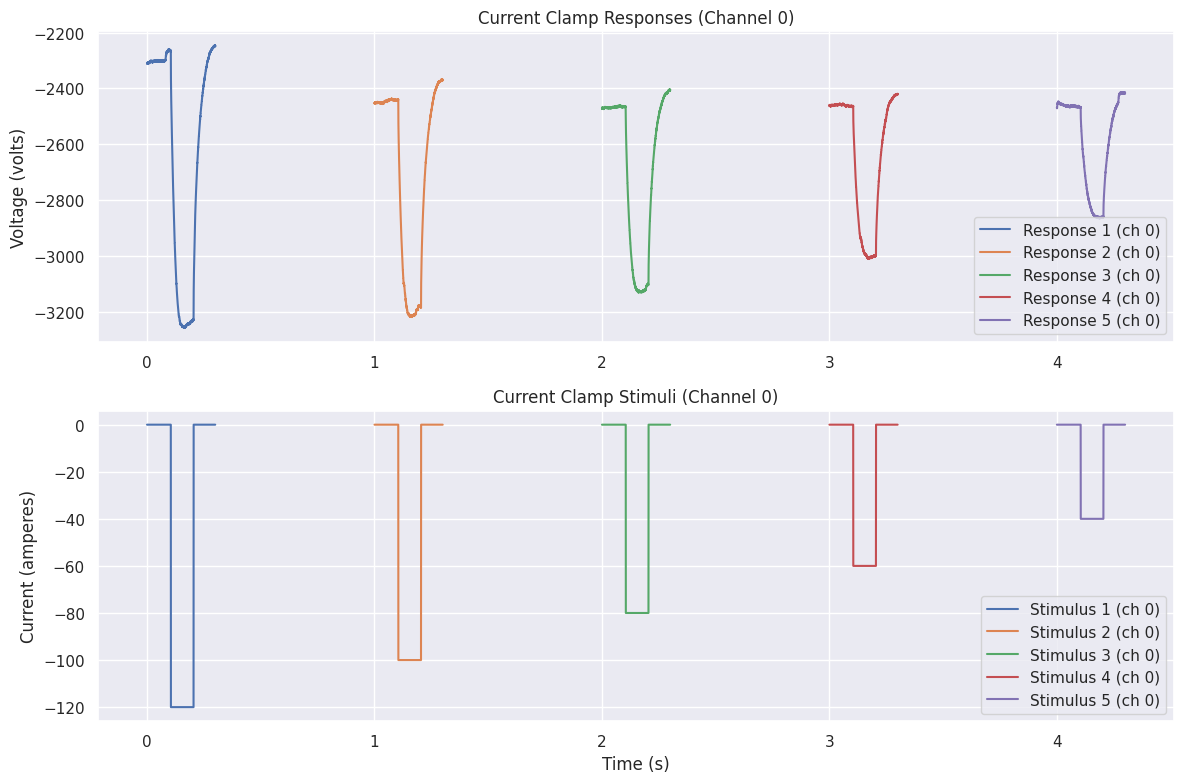

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Get some of the current clamp response series channel 0
response_series_ch0 = [nwb.acquisition[f"current_clamp-response-{i:02d}-ch-0"] for i in range(1, 6)] # First 5 sweeps

# Get the corresponding current clamp stimulus series channel 0
stimulus_series_ch0 = [nwb.stimulus[f"stimulus-{i:02d}-ch-0"] for i in range(1, 6)] # First 5 sweeps

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for i, response_series in enumerate(response_series_ch0):
    data_response = response_series.data[:]
    sampling_rate_response = response_series.rate
    starting_time_response = response_series.starting_time
    timestamps_response = starting_time_response + np.arange(len(data_response)) / sampling_rate_response
    plt.plot(timestamps_response, data_response, label=f'Response {i+1} (ch 0)')

plt.ylabel(f'Voltage ({response_series_ch0[0].unit})')
plt.title('Current Clamp Responses (Channel 0)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for i, stimulus_series in enumerate(stimulus_series_ch0):
    data_stimulus = stimulus_series.data[:]
    sampling_rate_stimulus = stimulus_series.rate
    starting_time_stimulus = stimulus_series.starting_time
    timestamps_stimulus = starting_time_stimulus + np.arange(len(data_stimulus)) / sampling_rate_stimulus
    plt.plot(timestamps_stimulus, data_stimulus, label=f'Stimulus {i+1} (ch 0)')

plt.xlabel('Time (s)')
plt.ylabel(f'Current ({stimulus_series_ch0[0].unit})')
plt.title('Current Clamp Stimuli (Channel 0)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In the plots above, we see the voltage responses of the neuron to injected current steps of increasing amplitudes. As the injected current becomes more negative, the membrane potential hyperpolarizes (becomes more negative). This plot demonstrates typical passive membrane properties of a neuron in response to subthreshold current injection. The shape of the response curves is characteristic of the cell's membrane resistance and capacitance.

We can also visualize one of the current clamp response and stimulus data series from Channel 1. Note that based on initial exploration, some recordings on channel 1 may have data quality issues, so we are selecting a specific sweep (Sweep 02) for illustration, as it appeared to be a clean recording.

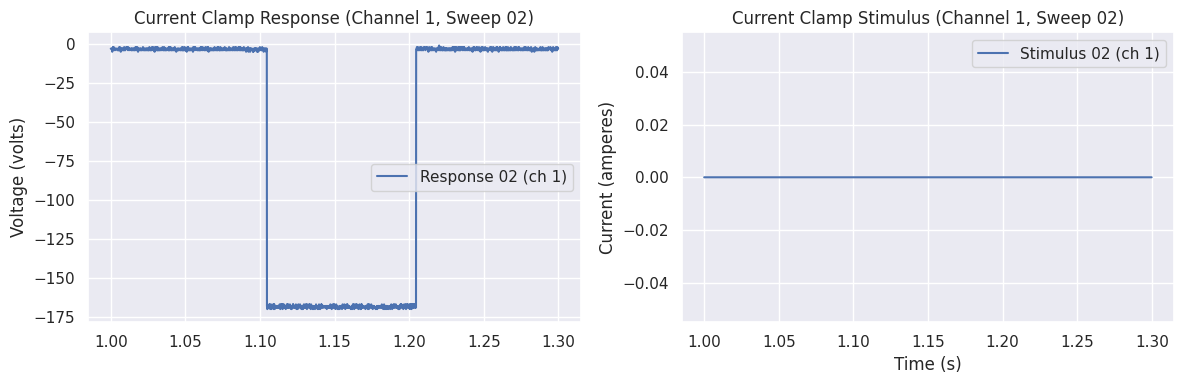

In [6]:
# Get the second current clamp response series channel 1
response_series_02_ch1 = nwb.acquisition["current_clamp-response-02-ch-1"]

# Get the second current clamp stimulus series channel 1
stimulus_series_02_ch1 = nwb.stimulus["stimulus-02-ch-1"]

# Get the data and time information for response channel 1
data_response_02_ch1 = response_series_02_ch1.data[:]
sampling_rate_response_02_ch1 = response_series_02_ch1.rate
starting_time_response_02_ch1 = response_series_02_ch1.starting_time
timestamps_response_02_ch1 = starting_time_response_02_ch1 + np.arange(len(data_response_02_ch1)) / sampling_rate_response_02_ch1

# Get the data and time information for stimulus channel 1
data_stimulus_02_ch1 = stimulus_series_02_ch1.data[:]
sampling_rate_stimulus_02_ch1 = stimulus_series_02_ch1.rate
starting_time_stimulus_02_ch1 = stimulus_series_02_ch1.starting_time
timestamps_stimulus_02_ch1 = starting_time_stimulus_02_ch1 + np.arange(len(data_stimulus_02_ch1)) / sampling_rate_stimulus_02_ch1

# Create the plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(timestamps_response_02_ch1, data_response_02_ch1, label='Response 02 (ch 1)')
plt.ylabel(f'Voltage ({response_series_02_ch1.unit})')
plt.title('Current Clamp Response (Channel 1, Sweep 02)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(timestamps_stimulus_02_ch1, data_stimulus_02_ch1, label='Stimulus 02 (ch 1)')
plt.xlabel('Time (s)')
plt.ylabel(f'Current ({stimulus_series_02_ch1.unit})')
plt.title('Current Clamp Stimulus (Channel 1, Sweep 02)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The plot for Channel 1, Sweep 02 shows the voltage response to a brief positive current pulse. We see a quick depolarization (increase in voltage) during the pulse, followed by repolarization back to the baseline. This also reflects the passive membrane properties. Note that other sweeps on Channel 1 may show different responses or potential recording issues.

## Summary and Future Directions
This notebook provided a basic introduction to accessing and exploring the electrophysiology data in Dandiset 001195. We demonstrated how to load the Dandiset, examine an NWB file, inspect its contents, and visualize some of the current clamp recordings.

Possible future directions for analysis could include:
- Analyzing other sweeps and channels in the NWB file.
- Investigating the voltage clamp recordings.
- Exploring the histology images if available in other NWB files.
- Examining the behavioral video and calcium imaging data in other assets of the Dandiset.
- Performing more advanced analysis on the electrophysiology data, such as calculating membrane properties or analyzing firing patterns (note that spike sorting and similar complex analyses are typically performed outside of a notebook environment).

Remember to refer to the Dandiset metadata and the NWB file structure for more details on the available data and experimental conditions. To further explore the different sweeps, you can examine the "Icephys Sequential Recordings Table" displayed earlier, which indicates the stimulus type for each sweep.

Closing the NWB file and the remote file.

In [7]:
io.close()
h5_file.close()
remote_file.close()